In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install Sastrawi==1.0.1

     |████████████████████████████████| 215kB 5.6MB/s 


In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
import pytz 
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import ast
import string
from wordcloud import WordCloud
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
#from googletrans import Translator

nltk.download('punkt')
nltk.download('stopwords')
stopwords = set(stopwords.words('indonesian'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def del_word(x,key_list):
    n = len(key_list)
    word_tokens = word_tokenize(x)
    new_x =''
    for word in word_tokens:
        if word not in key_list:
            new_x = new_x+word+' '
    return new_x

def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=10):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr


# function to write the word's sentiment if it is founded
def found_word(ind,words,word,sen,sencol,sentiment,add):
    # if it is already included in the bag of words matrix, then just increase the value
    if word in sencol:
        sen[sencol.index(word)] += 1
    else:
    #if not, than add new word
        sencol.append(word)
        sen.append(1)
        add += 1
    #if there is a negation word before it, the sentiment would be the negation of it's sentiment
    if (words[ind-1] in negasi):
        sentiment += -lexicon['weight'][lexicon_word.index(word)]
    else:
        sentiment += lexicon['weight'][lexicon_word.index(word)]
    
    return sen,sencol,sentiment,add

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/spasi_project/output_dataseet_web_crawling/output_clean.csv')
df

,Unnamed: 0,link,tanggal,judul,keyword,detail,sumber,token_bersih
0,0.0,http://regional.kompas.com/read/2021/03/15/170...,03/15/2021,Korban Kedua Karamnya Kapal Klotok di Sungai B...,"['korban', 'kedua', 'karamnya', 'kapal', 'klot...",korban kedua karamnya kapal klotok daerah isti...,kompas,korban karam kapal klotok daerah istimewa sung...
1,1.0,http://internasional.kompas.com/read/2021/03/0...,03/04/2021,"Selamatkan 4 Kucing dari Kapal Tenggelam, Pela...","['selamatkan', '4', 'kucing', 'dari', 'kapal',...",selamatkan 4 kucing dari kapal tenggelam pelau...,kompas,selamat 4 kucing kapal tenggelam laut thailand...
2,2.0,http://www.kompas.com/global/read/2021/02/23/1...,02/23/2021,"Kapal Terbalik dan Karam di Danau Mariout, Mes...","['kapal', 'terbalik', 'dan', 'karam', 'daerah'...",kapal terbalik dan karam daerah istimewa danau...,kompas,kapal balik karam daerah istimewa danau mariou...
3,3.0,http://regional.kompas.com/read/2021/01/20/214...,01/20/2021,"Kapal Nelayan Karam Ditabrak Kapal Tanker, 12 ...","['kapal', 'nelayan', 'karam', 'ditabrak', 'kap...",kapal nelayan karam ditabrak kapal tanker 12 a...,kompas,kapal nelayan karam tabrak kapal tanker 12 abk...
4,4.0,http://www.kompas.com/sains/read/2020/12/27/18...,12/27/2020,"Kapal Karam Penuh Gading, Ungkap Perburuan Gaj...","['kapal', 'karam', 'penuh', 'gading', 'ungkap'...",kapal karam penuh gading ungkap perburuan gaja...,kompas,kapal karam penuh gading buru gajah daerah ist...
...,...,...,...,...,...,...,...,...
871,NaN,https://www.jpnn.com/news/selamat-petani-rumpu...,03/22/2021,Selamat! Petani Rumput Laut NTT Kalahkan Perus...,"['selamat', 'petani', 'rumput', 'laut', 'nusa'...",selamat petani rumput laut nusa tenggara timur...,jpnn,selamat tani rumput laut nusa tenggara timur k...
872,NaN,https://www.viva.co.id/otomotif/1357954-petuga...,03/22/2021,Petugas SPBU Kembali Jadi Sorotan Warganet,"['petugas', 'setasiun', 'pengisian', 'bahan', ...",petugas setasiun pengisian bahan bakar umum ke...,viva,tugas setasiun isi bahan bakar sorot warganet
873,NaN,https://www.tempo.co/abc/6460/petani-rumput-la...,03/22/2021,Petani Rumput Laut NTT Menang Gugatan di Austr...,"['petani', 'rumput', 'laut', 'nusa', 'tenggara...",petani rumput laut nusa tenggara timur menang ...,tempo,tani rumput laut nusa tenggara timur menang gu...
874,NaN,https://banten.suara.com/read/2021/03/22/08150...,03/22/2021,Angkot Nubruk Pembatas Jalan di Cipocok Serang...,"['angkutan', 'kota', 'nubruk', 'pembatas', 'ja...",angkutan kota nubruk pembatas jalan daerah ist...,suara,angkut kota nubruk batas jalan daerah istimewa...


In [ ]:
negasi = ['bukan','tidak','ga','gk']
lexicon = pd.read_csv('/content/gdrive/MyDrive/spasi_project/lex_dataset/full_lexicon.csv')
lexicon = lexicon.drop(lexicon[(lexicon['word'] == 'bukan')
                               |(lexicon['word'] == 'tidak')
                               |(lexicon['word'] == 'ga')|(lexicon['word'] == 'gk') ].index,axis=0)
lexicon = lexicon.reset_index(drop=True)

In [ ]:
word_dict = {}
for i in range(0,len(df['token_bersih'])):
    sentence = df['token_bersih'][i]
    word_token = word_tokenize(sentence)
    for j in word_token:
        if j not in word_dict:
            word_dict[j] = 1
        else:
            word_dict[j] += 1

In [ ]:
lexicon_word = lexicon['word'].to_list()
lexicon_num_words = lexicon['number_of_words']

In [ ]:
ns_words = []
factory = StemmerFactory()
stemmer = factory.create_stemmer()
for word in word_dict.keys():
    if word not in lexicon_word:
        kata_dasar = stemmer.stem(word)
        if kata_dasar not in lexicon_word:
            ns_words.append(word)
len(ns_words)

1525

In [ ]:
len({k:v for (k,v) in word_dict.items() if ((k in ns_words)&(v>3)) })
ns_words_list = {k:v for (k,v) in word_dict.items() if ((k in ns_words)&(v>3))}

In [ ]:
sort_orders = sorted(ns_words_list.items(), key=lambda x: x[1], reverse=True)
sort_orders=sort_orders[0:20]
for i in sort_orders:
    print(i[0], i[1])

daerah 397
istimewa 376
indonesia 231
laut 142
tenggelam 125
nelayan 92
nasional 81
ikan 75
tentara 58
notaris 57
suez 55
terus 52
selam 50
republik 46
selundup 45
abk 42
malaysia 42
karam 37
polisi 35
all 35


In [ ]:
word_to_plot = df['token_bersih'].copy()
word_to_plot_1 = word_to_plot.apply(lambda x: del_word(x,negasi))

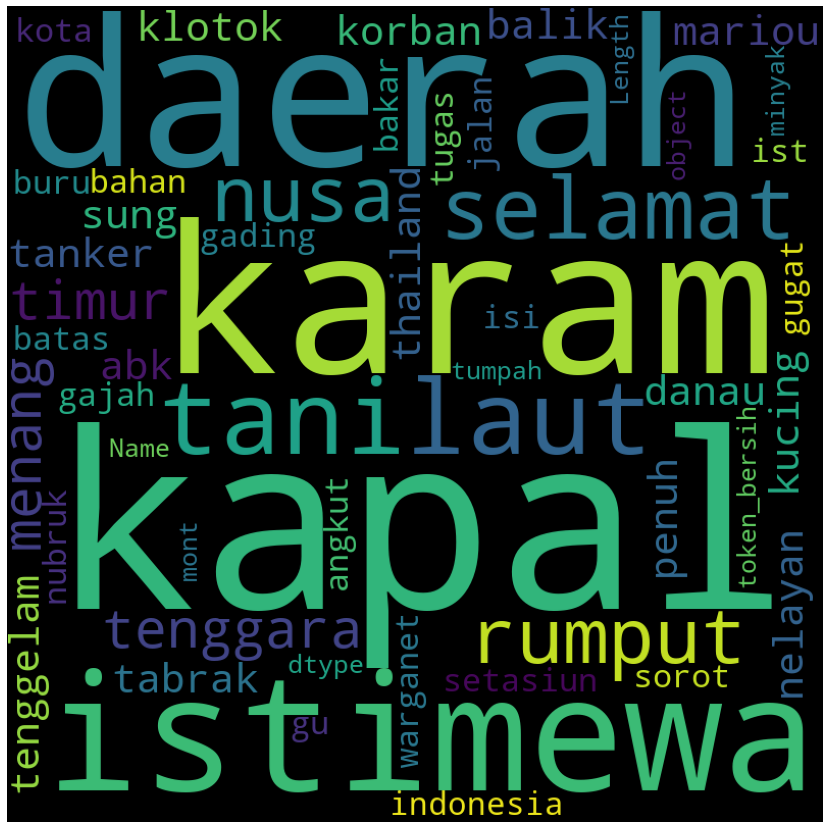

In [ ]:
wordcloud = WordCloud(width = 800, height = 800, background_color = 'black', max_words = 1000
                      , min_font_size = 20).generate(str(word_to_plot_1))
#plot the word cloud
fig = plt.figure(figsize = (15,15), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
sencol =[]
senrow =np.array([])
nsen = 0
factory = StemmerFactory()
stemmer = factory.create_stemmer()
sentiment_list = []
# function to write the word's sentiment if it is founded
def found_word(ind,words,word,sen,sencol,sentiment,add):
    # if it is already included in the bag of words matrix, then just increase the value
    if word in sencol:
        sen[sencol.index(word)] += 1
    else:
    #if not, than add new word
        sencol.append(word)
        sen.append(1)
        add += 1
    #if there is a negation word before it, the sentiment would be the negation of it's sentiment
    if (words[ind-1] in negasi):
        sentiment += -lexicon['weight'][lexicon_word.index(word)]
    else:
        sentiment += lexicon['weight'][lexicon_word.index(word)]
    
    return sen,sencol,sentiment,add
            
# checking every words, if they are appear in the lexicon, and then calculate their sentiment if they do
for i in range(len(df)):
    nsen = senrow.shape[0]
    words = word_tokenize(df['token_bersih'][i])
    sentiment = 0 
    add = 0
    prev = [0 for ii in range(len(words))]
    n_words = len(words)
    if len(sencol)>0:
        sen =[0 for j in range(len(sencol))]
    else:
        sen =[]
    
    for word in words:
        ind = words.index(word)
        # check whether they are included in the lexicon
        if word in lexicon_word :
            sen,sencol,sentiment,add= found_word(ind,words,word,sen,sencol,sentiment,add)
        else:
        # if not, then check the root word
            kata_dasar = stemmer.stem(word)
            if kata_dasar in lexicon_word:
                sen,sencol,sentiment,add= found_word(ind,words,kata_dasar,sen,sencol,sentiment,add)
        # if still negative, try to match the combination of words with the adjacent words
            elif(n_words>1):
                if ind-1>-1:
                    back_1    = words[ind-1]+' '+word
                    if (back_1 in lexicon_word):
                        sen,sencol,sentiment,add= found_word(ind,words,back_1,sen,sencol,sentiment,add)
                    elif(ind-2>-1):
                        back_2    = words[ind-2]+' '+back_1
                        if back_2 in lexicon_word:
                            sen,sencol,sentiment,add= found_word(ind,words,back_2,sen,sencol,sentiment,add)
    # if there is new word founded, then expand the matrix
    if add>0:  
        if i>0:
            if (nsen==0):
                senrow = np.zeros([i,add],dtype=int)
            elif(i!=nsen):
                padding_h = np.zeros([nsen,add],dtype=int)
                senrow = np.hstack((senrow,padding_h))
                padding_v = np.zeros([(i-nsen),senrow.shape[1]],dtype=int)
                senrow = np.vstack((senrow,padding_v))
            else:
                padding =np.zeros([nsen,add],dtype=int)
                senrow = np.hstack((senrow,padding))
            senrow = np.vstack((senrow,sen))
        if i==0:
            senrow = np.array(sen).reshape(1,len(sen))
    # if there isn't then just update the old matrix
    elif(nsen>0):
        senrow = np.vstack((senrow,sen))
        
    sentiment_list.append(sentiment)

In [ ]:
sencol.append('polarity')
sentiment_array = np.array(sentiment_list).reshape(senrow.shape[0],1)
sentiment_data = np.hstack((senrow,sentiment_array))
df_sen = pd.DataFrame(sentiment_data,columns = sencol)

In [ ]:
df_sen

,korban,kapal,temu,tewas,selamat,banjir,puji,balik,tabrak,hilang,buru,harga,bongkar,izin,kronologi,cepat,hantam,rebut,aku,satu,aksi,rezeki,muara,tinggal,rekan,ikat,kait,polemik,dukung,putus,resmi,buat,anak,nabi,ledak,saksi,kerja,fakta,kota,baik,...,tenang,terjun,ajar,akar,maut,masalah,gani,jauh,asasi,telan,beban,dilema,teladan,fatal,darah,samping,hilir,nekat,bekas,konfirmasi,wajib,pangsa,luas,isu,epidemi,pangeran,kaisar,lagu,ratu,sikap,kuno,lahir,umpat,omong,kotor,lupa,bingkis,opium,pegawai,polarity
0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-4
1,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10
2,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-3
3,0,2,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1
4,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9
872,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1
873,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7
874,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-11


In [ ]:
cek_df = pd.DataFrame([])
cek_df['text'] = df['token_bersih'].copy()
cek_df['polarity']  = df_sen['polarity'].copy()

In [ ]:
cek_df

,text,polarity
0,korban karam kapal klotok daerah istimewa sung...,-4
1,selamat 4 kucing kapal tenggelam laut thailand...,10
2,kapal balik karam daerah istimewa danau mariou...,-3
3,kapal nelayan karam tabrak kapal tanker 12 abk...,-1
4,kapal karam penuh gading buru gajah daerah ist...,-2
...,...,...
871,selamat tani rumput laut nusa tenggara timur k...,9
872,tugas setasiun isi bahan bakar sorot warganet,-1
873,tani rumput laut nusa tenggara timur menang gu...,7
874,angkut kota nubruk batas jalan daerah istimewa...,-11


Text(0.5, 0, 'sentiment')

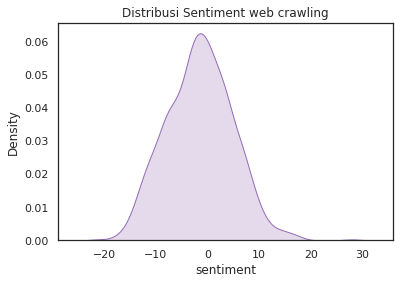

In [ ]:
sns.set(style="white", palette="muted", color_codes=True)
sns.kdeplot(df_sen['polarity'],color='m',shade=True)
plt.title('Distribusi Sentiment web crawling')
plt.xlabel('sentiment')

In [ ]:
au = get_top_abs_correlations(df_sen, 15)

Perfect Correlation


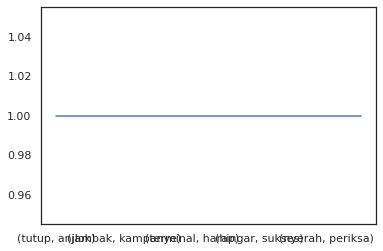

In [ ]:
print('Perfect Correlation')


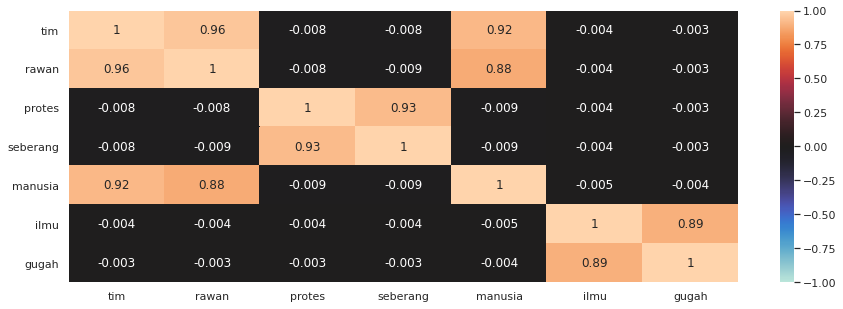

In [ ]:

top10 = au[au<float(1)][0:5]
label = top10.index
label_list =[]
for i in label:
    for j in i:
        if(j not in label_list):
            label_list.append(j)
            
df_sen_corr = df_sen[label_list]
corr = df_sen_corr.corr()
for i in label_list:
    for j in label_list:
        if i!=j:
            corr[i][j] = round(corr[i][j],3)


plt.figure(figsize=(15,5))

h = sns.heatmap(corr, annot=True,vmin=-1, vmax=1, center= 0)

plt.show()

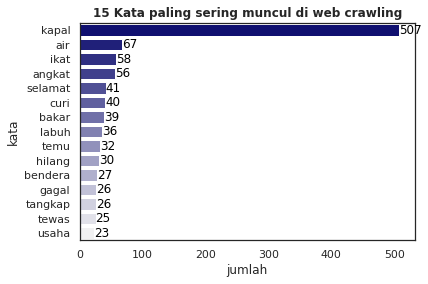

In [ ]:
top15_word = df_sen.drop(['polarity'],axis=1).sum().sort_values(ascending=False)[0:15]

#pal =sns.dark_palette("purple", input="xkcd",n_colors=15)
pal =sns.light_palette("navy", reverse=True,n_colors=15)
g = sns.barplot(y = top15_word.index , x = top15_word,palette=pal)
g.grid(False)
plt.xlabel('jumlah')
plt.ylabel('kata')
plt.title("15 Kata paling sering muncul di web crawling",fontweight='bold') 
for i in range(15):
    g.text(top15_word[i],i+0.22, top15_word[i],color='black')
plt.show()

In [ ]:
df['polarity'] = df_sen['polarity']

In [ ]:
df_place = df.groupby(['sumber']).mean().sort_values(by='polarity',ascending=False)
df_place = df_place.reset_index()

In [ ]:
df_place_dict = df.groupby(['sumber']).count().sort_values(by='Unnamed: 0',ascending=False)['Unnamed: 0'].to_dict()
#df_place_dict = df.groupby(['sumber']).count().sort_values(by='sumber',ascending=False)['sumber'].to_dict()

In [ ]:

df_place['number_of_article'] =  df_place.apply(lambda x:df_place_dict[x['sumber']],axis=1)

In [ ]:
top10_place_pos = df_place.sort_values(by='polarity',ascending=False)[0:20].reset_index(drop=True)
top10_place_neg = df_place.sort_values(by='polarity',ascending=True)[0:20].reset_index(drop=True)
top10_place     = df_place.sort_values(by='number_of_article',ascending=False)[0:20].reset_index(drop=True)

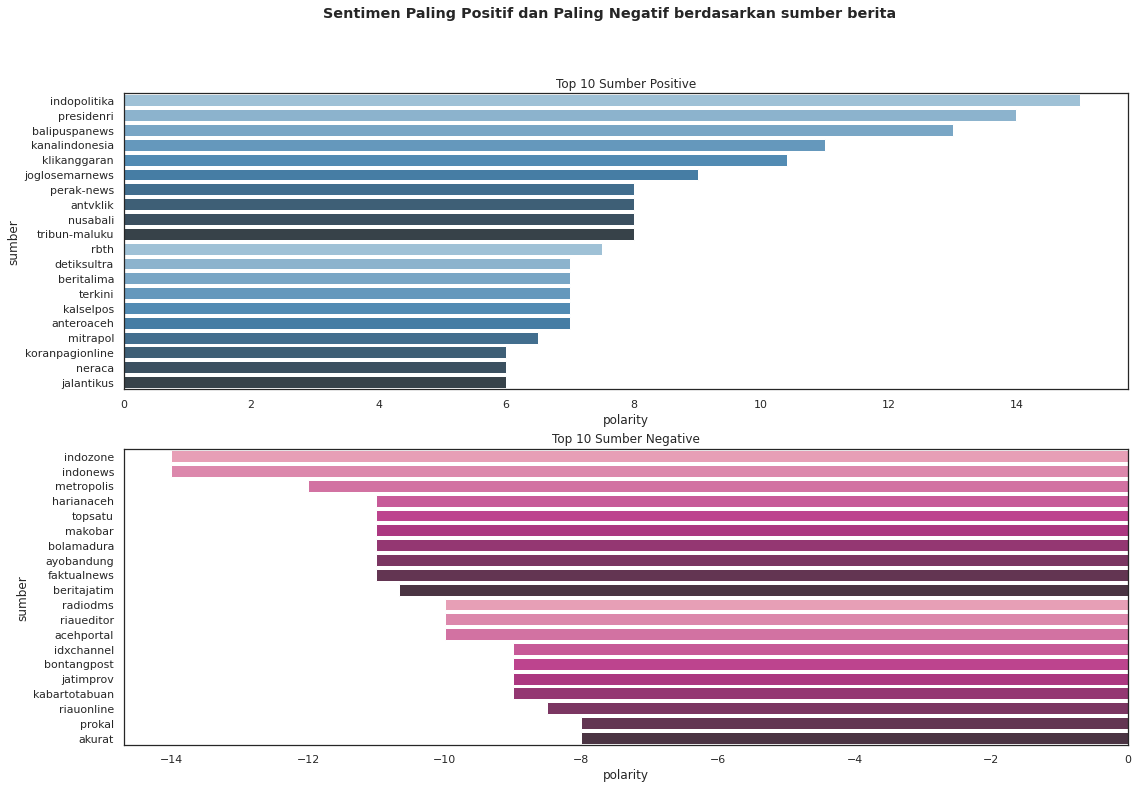

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(18,12))
fig.suptitle('Sentimen Paling Positif dan Paling Negatif berdasarkan sumber berita',fontweight='bold')
h = sns.barplot(y='sumber',x='polarity',data=top10_place_pos,ax=ax1,palette=sns.color_palette("Blues_d",n_colors=10))
n = sns.barplot(y='sumber',x='polarity',data=top10_place_neg,ax=ax2,palette=sns.color_palette('RdPu_d',n_colors=10))
ax1.set_title('Top 10 Sumber Positive')
ax2.set_title('Top 10 Sumber Negative')
plt.show()

In [ ]:
def num_to_label(num):
  if (num > 0):
    return "positif"
  elif (num < 0):
    return "negatif"
  else :
    return "netral"




In [ ]:
df['sentiment'] = [num_to_label(num) for num in df.polarity.astype(int)]

In [ ]:
df.to_csv('/content/gdrive/MyDrive/spasi_project/output_dataseet_web_crawling/output_with_sentiment.csv', sep=',',index = False)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df.token_bersih)
y = np.array(df.sentiment.values)


In [ ]:

sampler = SMOTE()
X, Y = sampler.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(
                   X, Y, test_size=0.33, random_state=42)
X_train.shape, y_train.shape , X_test.shape , y_test.shape

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


((978, 2158), (978,), (483, 2158), (483,))

In [ ]:
svm_classifier = SVC().fit(X_train, y_train)
nb_classifier = GaussianNB().fit(X_train.toarray(), y_train)
logreg_classifier = LogisticRegression().fit(X_train, y_train)

In [ ]:
print("SVM Algorithm")
print(classification_report(y_test, svm_classifier.predict(X_test)))
print("Navie Bayes Algoritm")
print(classification_report(y_test, nb_classifier.predict(X_test.toarray())))
print("logistic Regression")
print(classification_report(y_test, logreg_classifier.predict(X_test)))

SVM Algorithm
              precision    recall  f1-score   support

     negatif       0.79      0.93      0.86       153
      netral       0.99      0.97      0.98       172
     positif       0.92      0.78      0.85       158

    accuracy                           0.90       483
   macro avg       0.90      0.89      0.89       483
weighted avg       0.90      0.90      0.90       483

Navie Bayes Algoritm
              precision    recall  f1-score   support

     negatif       0.84      0.75      0.79       153
      netral       0.96      0.98      0.97       172
     positif       0.80      0.87      0.83       158

    accuracy                           0.87       483
   macro avg       0.86      0.86      0.86       483
weighted avg       0.87      0.87      0.87       483

logistic Regression
              precision    recall  f1-score   support

     negatif       0.88      0.82      0.85       153
      netral       0.94      0.97      0.96       172
     positif       0

Text(0.5, 1.0, 'confusion matrix of SVM Classifier')

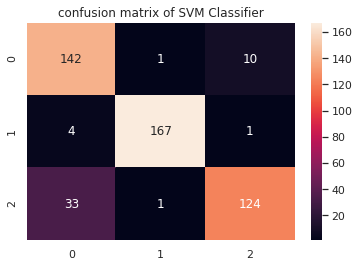

In [ ]:
sns.heatmap(confusion_matrix(y_test, svm_classifier.predict(X_test)), annot=True, fmt='d')
plt.title("confusion matrix of SVM Classifier")